In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sympy
from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load data
iris = load_iris()
x = pd.DataFrame(iris['data'],columns=iris['feature_names'])
y = pd.DataFrame(iris['target'],columns=['target'])
iris = pd.concat([x,y],axis = 1)
print (iris.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

In [91]:
# markers & colors para
markers = ['o','^','x']
colors = ['red','green','blue']
cmap = ListedColormap(colors[:len(np.unique(y))])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


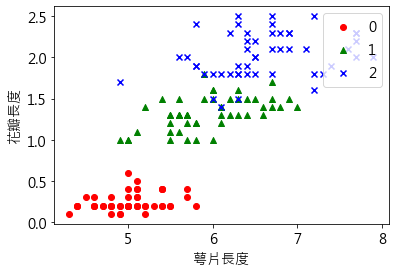

<Figure size 1440x1440 with 0 Axes>

In [96]:
# plot scatter 
y = iris['target'].values
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['font.size'] =14
for i , j in enumerate(np.unique(y)) :
    p = iris[y == j] 
    plt.scatter( x = p['sepal length (cm)'] , y = p['petal width (cm)'],c = cmap(i),marker=markers[i],label = j )
plt.xlabel('萼片長度')
plt.ylabel('花瓣長度')
plt.legend(loc = 'upper right')
plt.figure(figsize=(20,20))
plt.show()

In [5]:
#make Xs normalized by standard scalar
iris = iris[iris['target'].isin([1,2])]

train_x,test_x,train_y,test_y = train_test_split(iris[['sepal length (cm)','petal length (cm)']],\
                                                 iris['target'],test_size= 0.3,random_state=42)
sc = StandardScaler()
train_x_std = sc.fit_transform(train_x)
test_x_std = sc.fit_transform(test_x)
print(train_x_std.shape)
print(test_x_std.shape)

(70, 2)
(30, 2)


In [6]:
# set model and train , default penalty = l2
model = LogisticRegression()#penalty= 'l1',solver='liblinear')
model.fit(train_x_std,train_y,)

LogisticRegression()

In [7]:
print('係數 :',model.coef_)
print('截距 : ',model.intercept_)
ZZ = sympy.Symbol('z')
y = (1/(1+sympy.exp(-ZZ)))
display(y)
print('其中z = %.4f + %.4fx_1 + %.4fx_2'%(model.intercept_,model.coef_[0][0],model.coef_[0][1]))

係數 : [[-0.43972306  3.31482585]]
截距 :  [0.23006753]


1/(1 + exp(-z))

其中z = 0.2301 + -0.4397x_1 + 3.3148x_2


In [8]:
print('----驗證-----')
print(model.predict_proba([[10,0.3]])[0])
print(1/(1+np.exp(-(0.2301+-0.4397*10+3.3148*0.3))))
print(model.predict([[10,0.3]]))
print('----驗證-----')
print(model.predict_proba([[1,2]])[0])
print(1/(1+np.exp(-(0.2301+-0.4397*1+3.3148*2))))
print(model.predict([[1,2]]))

----驗證-----
[0.9597945 0.0402055]
0.04021535667139673
[1]
----驗證-----
[0.00162601 0.99837399]
0.9983739919733222
[2]


In [ ]:
plt.contourf?

In [9]:
print(model.predict(test_x_std))
print(test_y.values)
[print(' X',end = '') if i != j else print('  ',end = '') for i,j in zip(model.predict(test_x_std),test_y.values)]# :]
cm = confusion_matrix(test_y,model.predict(test_x_std))
print()
print(cm)


[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2 1 1 2 1 2]
[2 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 2 1 1 2 1 2]
             X             X                                
[[15  2]
 [ 0 13]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\2022040601\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2022040601\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


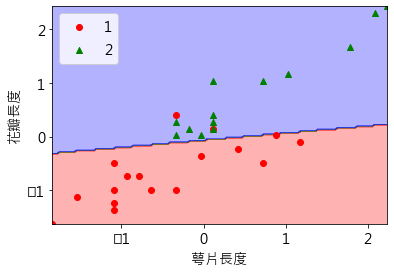

In [11]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
x = test_x_std
y = test_y.values
x0min,x0max = x[:,0].min() , x[:,0].max()
x1min,x1max = x[:,1].min() , x[:,1].max()
a,b = np.meshgrid(np.arange(x0min,x0max,0.03),np.arange(x1min,x1max,0.03))
z = model.predict(np.array([a.ravel(),b.ravel()]).T)
z = z.reshape(a.shape)
plt.contourf(a,b,z,alpha = 0.3,cmap = cmap)
plt.xlim(a.min(),a.max())
plt.ylim(b.min(),b.max())
for i ,j in enumerate(np.unique(y)) :
    p = x[y == j]
    plt.scatter(x = p[:,0], y = p[:,1],c = cmap(i),marker= markers[i],label = j)
plt.xlabel('萼片長度')
plt.ylabel('花瓣長度')
plt.legend(loc = 'upper left')
plt.show()

In [12]:
import seaborn as sns

In [13]:
df = pd.read_csv('diabetes.csv')
df = df.applymap(lambda x : str(x).replace(',','.'))

In [14]:
df['diabetes'] =df['diabetes'].apply(lambda x : 1 if  x == 'Diabetes' else 0)

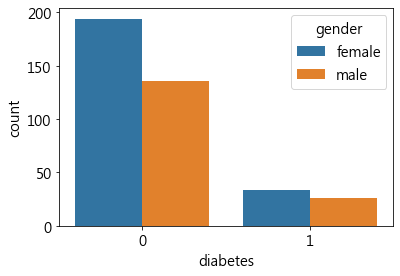

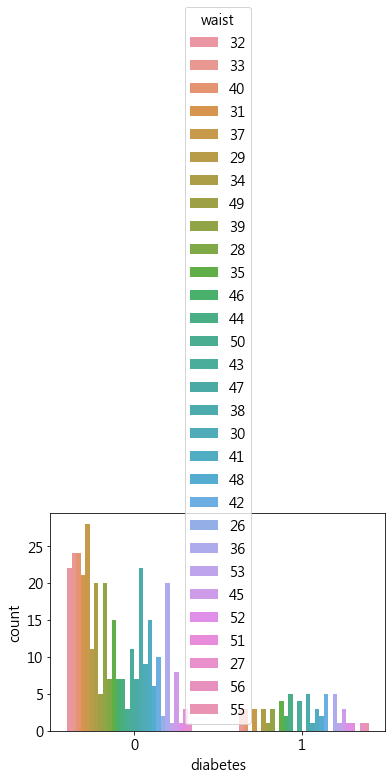

In [15]:
sns.countplot(x = 'diabetes',hue = 'gender',data = df)
plt.show()
sns.countplot(x = 'diabetes',hue = 'waist',data = df)
plt.show()

In [16]:
x = df.loc[:,~df.columns.isin(['diabetes'])]
y = df.loc[:,df.columns.isin(['diabetes'])]
LE = LabelEncoder()
x['gender'] = LE.fit_transform(x['gender'])
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,random_state=42)
print(train_x.shape)
print(test_x.shape)

(312, 15)
(78, 15)


C:\Users\202204~1\AppData\Local\Temp/ipykernel_5912/1978121381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['gender'] = LE.fit_transform(x['gender'])


In [17]:
model2 = LogisticRegression()
model2.fit(train_x,train_y)

C:\Users\2022040601\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\2022040601\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print(model2.coef_[0])
print(model2.intercept_)

[ 0.0206345   0.01126769  0.03264136 -0.01630018 -0.02160028 -0.09373353
  0.00485166 -0.15051172  0.02224476 -0.09122082  0.00856073  0.00213376
  0.00188722 -0.00385269 -0.00271019]
[-0.0033853]


In [19]:
cm = confusion_matrix(model2.predict(test_x),test_y)
cm

array([[58,  3],
       [ 4, 13]], dtype=int64)

In [20]:
df = pd.read_csv('HR_comma_sep.csv')
print(df.isna().sum())
print(df.describe())
df

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000  

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


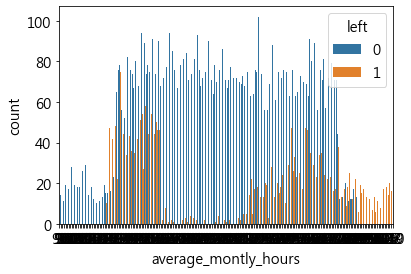

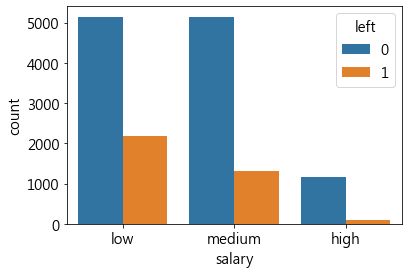

In [21]:
sns.countplot(x = 'average_montly_hours',hue = 'left',data = df)
plt.show()
sns.countplot(x = 'salary',hue = 'left',data = df)
plt.show()

In [22]:
x = df.loc[:,~df.columns.isin(['left'])]
y = df.loc[:,df.columns.isin(['left'])]

In [71]:
display(x.corr().style.applymap(lambda x : 'color: red' if x > 0.5 else 'color: white'))
VIF = pd.DataFrame(columns=['VIF'],index = x.columns)
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF.style.applymap(lambda x : 'color : yellow' if x >= 10 else 'color : white')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.003425,-0.002506
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001318,0.000685,1.000000


,VIF
satisfaction_level,6.466087
last_evaluation,20.621566
number_project,13.901185
average_montly_hours,19.507480
time_spend_company,6.639859
Work_accident,1.172840
promotion_last_5years,1.030144
Department,4.709552
salary,5.092658


In [24]:
x['Department'] = LE.fit_transform(x['Department'])
print(list(zip(x['Department'].unique(),df['Department'].unique())))
x['salary'] = LE.fit_transform(x['salary'])
print(list(zip(x['salary'].unique(),df['salary'].unique())))

[(7, 'sales'), (2, 'accounting'), (3, 'hr'), (9, 'technical'), (8, 'support'), (4, 'management'), (0, 'IT'), (6, 'product_mng'), (5, 'marketing'), (1, 'RandD')]
[(1, 'low'), (2, 'medium'), (0, 'high')]


C:\Users\202204~1\AppData\Local\Temp/ipykernel_5912/1134096877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Department'] = LE.fit_transform(x['Department'])
C:\Users\202204~1\AppData\Local\Temp/ipykernel_5912/1134096877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['salary'] = LE.fit_transform(x['salary'])


In [25]:
sc = StandardScaler()
std_x = x.copy()
std_x.loc[:,~std_x.columns.isin(['salary','Department','promotion_last_5years','Work_accident'])] = sc.fit_transform(std_x.loc[:,~std_x.columns.isin(['salary','Department','promotion_last_5years','Work_accident'])])

In [72]:
display(std_x.corr().style.applymap(lambda x: 'color : red' if x >0.7 else 'color : white'))
VIF2 = pd.DataFrame(columns=['VIF'],index = std_x.columns)
VIF2['VIF'] = [variance_inflation_factor(std_x.values,i) for i in range(len(std_x.columns))]
VIF2.style.applymap(lambda x : 'color : yellow' if x >= 10 else 'color : white')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.003425,-0.002506
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001318,0.000685,1.000000


,VIF
satisfaction_level,1.063188
last_evaluation,1.240573
number_project,1.352433
average_montly_hours,1.278963
time_spend_company,1.060777
Work_accident,1.156095
promotion_last_5years,1.026542
Department,3.019809
salary,3.029188


In [80]:
train_x , test_x , train_y , test_y = train_test_split(std_x,y,test_size=0.2,random_state=42)

In [81]:
model3 = LogisticRegression()

In [82]:
model3.fit(train_x,train_y)
model3.score(test_x,test_y)

C:\Users\2022040601\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7576666666666667

In [83]:
cm = confusion_matrix(model3.predict(test_x),test_y)
cm

array([[2113,  546],
       [ 181,  160]], dtype=int64)